<a href="https://colab.research.google.com/github/IronZiiz/Data-Science-Linear-regression/blob/main/HW_energy_company_VIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Case Study: Detecting Multicollinearity and Homoscedasticity in the Energy Sector

In this case study, we will apply the concepts of multicollinearity and homoscedasticity in a new context: the energy sector. Your task involves conducting the following steps:

Step 1: Multicollinearity Analysis
Evaluate multicollinearity using the Variance Inflation Factor (VIF). If there are signs of multicollinearity among the variables, consider potential measures to address the issue. To do this, you will need to build a linear regression model, assuming that the column PE is the dependent variable (y).

Step 2: Residual Analysis and Heteroscedasticity Detection
Perform a residual analysis to determine whether heteroscedasticity is present in the data. Identify patterns and assess the potential impact on model reliability.

This case provides a practical approach to understanding and mitigating common statistical issues in regression modeling within the energy sector.

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data

In [2]:
df_company = pd.read_csv('/content/drive/MyDrive/Alura/Data-Science-testando-relações-com-Regressão-Linear/usina.csv')

In [3]:
df_company.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


## Def x and y test

In [14]:
x = df_company.drop(columns = 'PE', axis=1)
y = df_company['PE']

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=230)

In [16]:
x_train = sm.add_constant(x_train)

In [26]:
model = sm.OLS(y_train, x_train).fit()

In [27]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 2.191e+04
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:43:58   Log-Likelihood:                -19662.
No. Observations:                6697   AIC:                         3.933e+04
Df Residuals:                    6692   BIC:                         3.937e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        446.1042     11.769     37.905      0.000     423.033     469.175
AT            -1.9607      0.018   -106.991      0.000      -1.997      -1.925
V             -0.2413      0.009    -27.670      0.000      -0.258      -0.224
AP             0.0702      0.011      6.152      0.000       0.048       0.093
RH            -0.1537      0.005    -30.823      0.000      -0.163      -0.144
==============================================================================
Omnibus:                      481.758   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1740.892
Skew:                          -0.300   Prob(JB):                         0.00
Kurtosis:                       5.424   Cond. No.                     2.15e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.15e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Multicollinearity Analysis

In [28]:
model.params

,0
const,446.104172
AT,-1.960745
V,-0.241288
AP,0.070242
RH,-0.153685


In [29]:
explicativas = ['const','AT','V','AP','RH']

In [30]:
vif_1 = pd.DataFrame()
vif_1["variavel"]= explicativas

vif_1['vif'] = [variance_inflation_factor(x_train[explicativas].values, i) for i in range(len(explicativas))]
print(vif_1)

  variavel           vif
0    const  44603.788615
1       AT      6.034363
2        V      3.954998
3       AP      1.468530
4       RH      1.717508


### Conclusions


##  Residual Analysis

In [32]:
y_predicted_train = model.predict(x_train[explicativas])

In [35]:
fig = px.scatter(x = y_predicted_train, y = y_train,
                 title = 'Predicted vs Real',
                 labels = {'x': 'Predicted', 'y': 'Real'},
                 )
fig.show()

In [36]:
resids = model.resid

<Axes: title={'center': 'Resid vs predicted'}, xlabel='Predict Price', ylabel='Resid'>

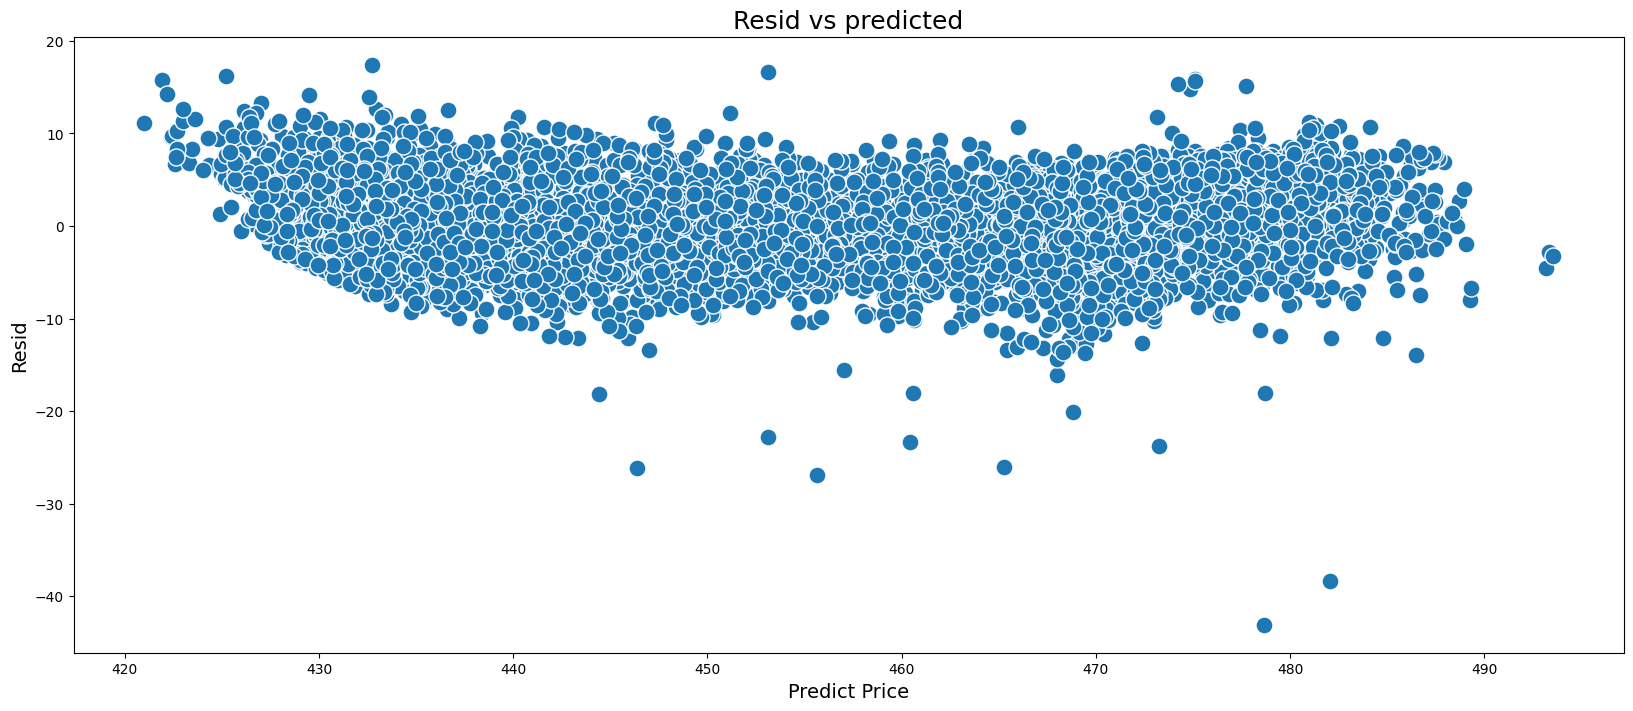

In [39]:
ax = sns.scatterplot(x=  y_predicted_train     , y= resids      , s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Resid vs predicted', fontsize=18)
ax.set_xlabel('Predict Price', fontsize=14)
ax.set_ylabel('Resid', fontsize=14)
ax

### Conclusions II
In this figure there is no detection of heteroscedasticity